<a href="https://colab.research.google.com/github/omid-sar/Interview-Preparation/blob/main/ML_interview/ML_int_twitter_toxic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/omid-sar/Project_Data_Hub/main/twitter_toxic_final_balanced_dataset.csv

--2024-05-09 21:10:47--  https://raw.githubusercontent.com/omid-sar/Project_Data_Hub/main/twitter_toxic_final_balanced_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5518854 (5.3M) [text/plain]
Saving to: ‘twitter_toxic_final_balanced_dataset.csv’

twitter_toxic_final 100%[===================>]   5.26M  --.-KB/s    in 0.05s   

2024-05-09 21:10:47 (114 MB/s) - ‘twitter_toxic_final_balanced_dataset.csv’ saved [5518854/5518854]



In [3]:
import pandas as pd
df_org = pd.read_csv("twitter_toxic_final_balanced_dataset.csv", usecols=["Toxicity", "tweet"])
df_org.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [4]:
for _ in range(10):
  rand = np.random.randint(len(df_org))
  print(df_org.iloc[rand]["tweet"], df_org.iloc[rand]["Toxicity"])

every celebration has a reason.ð   independence day folks!  0
#wishing to get 100 retweets. discouraged, the most i've had is like 1.    #helpmeplease #thankyou #ijustwanttofeellikesomebody 0
Money only impresses broke bitches. 1
i am thankful for me. #thankful #positive      0
he graduated from #usa &amp; his friends wanted him 2 forget his rector  against #islam  1
RT @FallonTonight: Jimmy and @BillyJoel's two-man doo-wop performance just went live on YouTube! https://t.co/NGzhImyvSF #FallonTonight htt&#8230; 0
finally a #wine glass that fits my needs! #reasonswhyilovemyself   #friday #winelover  0
this evening i went to @user in hampstead, saw lots of fab a and bought @user  beautiful photographic book on cuba   0
RT @excusemydank: "Fuck all the skinny bitches" @NICKIMINAJ #NeverForget &#128557;&#128128; http://t.co/Ndhqmn3LvU 1
@user  at work: attorneys for white officer who shot #philandocastile remove black judge from presiding over trial. htâ¦ 1


MAX LENGTH: 754


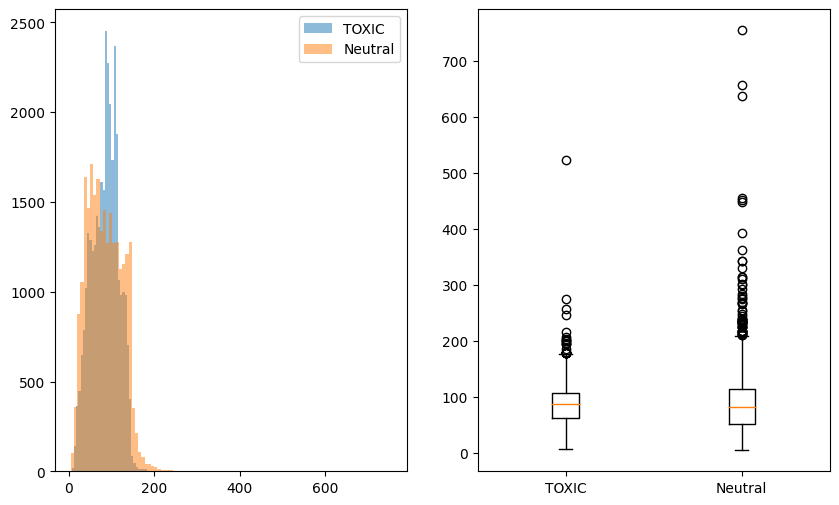

In [5]:
import matplotlib.pyplot as plt

df = df_org.copy()

df["tweet_len"] = [len(seq) for seq in df_org["tweet"]]
toxic_len = df[df["Toxicity"] == 0]["tweet_len"]
norm_len = df[df["Toxicity"] == 1]["tweet_len"]

print("MAX LENGTH:" ,max(df["tweet_len"]))

fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
ax1.hist(toxic_len, bins=100, alpha=0.5, label="TOXIC")
ax1.hist(norm_len, bins=100, alpha=0.5, label="Neutral")
ax1.legend()

ax2.boxplot([toxic_len, norm_len], labels=["TOXIC", "Neutral"])
plt.show()


In [6]:
# The most part of twwet lenghts are less than 200, so we cut them to reduce computation perpelixity
df = df[df["tweet_len"] <= 200].drop("tweet_len", axis=1)
X = df["tweet"].values
y = df["Toxicity"].values
sequences = [sequence for sequence in X]

In [7]:
from transformers import DistilBertTokenizer, BertTokenizer

distilled_tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [8]:
model_inputs = tokenizer(sequences, padding=True, return_tensors='pt')
model_inputs

{'input_ids': tensor([[  101,  1030,  5310,  ...,     0,     0,     0],
        [  101,  1030,  5310,  ...,     0,     0,     0],
        [  101, 12170, 14945,  ...,     0,     0,     0],
        ...,
        [  101,  2402, 10131,  ...,     0,     0,     0],
        [  101,  2017,  2226,  ...,     0,     0,     0],
        [  101,  1066,  1066,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [9]:
print("tweet: \n " , sequences[0],
      "\n input_ids: \n",  model_inputs.input_ids[0],
      "\n token_type_ids: \n" , model_inputs.token_type_ids[0],
      "\n attention_mask: \n" , model_inputs.attention_mask[0])

tweet: 
   @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 
 input_ids: 
 tensor([  101,  1030,  5310,  2043,  1037,  2269,  2003, 28466,  2389,  1998,
         2003,  2061, 14337,  2002,  8011,  2015,  2010,  4268,  2046,  2010,
        28466,  1012,  1001,  2448,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,

In [10]:
import torch
from torch.utils.data import DataLoader, TensorDataset

labels = torch.tensor(y)
dataset = TensorDataset(model_inputs["input_ids"], model_inputs["attention_mask"], labels)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4 , pin_memory=True)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [11]:
from torch.utils.data import random_split

train_size = int(len(dataset)* 0.7)
val_size = int(len(dataset)* 0.2)
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [ ]:
len(distilled_tokenizer.get_vocab())

30522

In [ ]:
from torch.nn import nn

MAX_LEN = 64
BATCH_SIZE = 2
VOCAB_SIZE = tokenizer.vocab_size
EMBEDDING_DIM = 50
HIDDEN_SIZE = 128
FC1_SIZE = 256
FC2_SIZE = 128

class LSTM(nn.Module):

  def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers=1, num_classes=2,
               bidirectional=True, f_c_layers=[128,256]):
    super(LSTM, self).__init__()

    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.bidirectional = bidirectional
    self.embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)
    self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, num_layers=num_layers,
                        batch_first=True, bidirectional=bidirectional)

    # The input size for the first fully connected layer
    fc_input_size = 2 * hidden_size if bidirectional==True else hidden_size

    self.fc1 = nn.Linear(fc_input_size, f_c_layers[0])
    self.fc2 = nn.Linear(f_c_layers[0], f_c_layers[1])
    self.fc3 = nn.Linear(f_c_layers[1], num_classes)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    x = self.embedding(x)

    # Initialize hidden and cell states
    h0 = torch.zeros(self.num_layers * (2 if self.bidirectional else 1), x.size(0), self.hidden_size).to(x.device)
    c0 = torch.zeros(self.num_layers * (2 if self.bidirectional else 1), x.size(0), self.hidden_size).to(x.device)

    out, _ = self.lstm(x, (h0, c0))

    # Take the output from the last time step (batch_size, seq_length, num_directions * hidden_size)
    out = out[:, -1, :]

    out = self.relu(self.fc1(out))
    out = self.relu(self.fc2(out))
    out = self.sigmoid(self.fc3(out))

    return out








